### Oct 2023: END SEMESTER ASSESSMENT (ESA) 
## M TECH DATA SCIENCE AND MACHINE LEARNING_ SEMESTER II

### UE20CS935: Introduction to Deep Learning and Applications


#### Section B: Question No:2   (10 marks)
This dataset has images from 8 different classes of household garbage; battery, biological, clothes, green-glass, metal, paper, plastic and shoes.

Garbage Recycling is a key aspect of preserving our environment. To make the recycling process possible/easier, the garbage must be sorted to groups that have similar recycling process

Dataset_Folder Name: Garbage classes 
120 images are there in every train grabage class folder. 

Conditions to consider:

--Parameters should not cross 300000

--Should not use more than 4 layers (except input and output, including convolution and dense layers)

--Use Adam Optimizer


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, GlobalAveragePooling2D, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [6]:
train_dir=r"section 2-3/garbage_classes/Train"
test_dir=r"section 2-3/garbage_classes/Test"

In [7]:
train_image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_image_generator = ImageDataGenerator(rescale=1./255)

In [9]:
target_size=(64, 64)
batch_size=32
train_data_generator = train_image_generator.flow_from_directory(
    directory=train_dir, 
    target_size=target_size, 
    class_mode='categorical',
    subset='training',
    shuffle=True                                                                 
)
validation_data_generator = train_image_generator.flow_from_directory(
    directory=train_dir, 
    target_size=target_size, 
    class_mode='categorical',
    subset='validation',
    shuffle=True                                                                 
)

test_data_generator = test_image_generator.flow_from_directory(
    directory=test_dir, 
    target_size=target_size, 
    class_mode='categorical'
    )

Found 768 images belonging to 8 classes.
Found 192 images belonging to 8 classes.
Found 240 images belonging to 8 classes.


In [11]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Flatten())
model.add(Dense(8, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 8)                

In [12]:
history = model.fit(train_data_generator, validation_data=validation_data_generator, epochs=3)

Epoch 1/3
24/24 [==============================] - 12s 477ms/step - loss: 1.9514 - accuracy: 0.2539 - val_loss: 1.8091 - val_accuracy: 0.4219
Epoch 2/3
24/24 [==============================] - 2s 97ms/step - loss: 1.5709 - accuracy: 0.4284 - val_loss: 1.5652 - val_accuracy: 0.4896
Epoch 3/3
24/24 [==============================] - 2s 96ms/step - loss: 1.3509 - accuracy: 0.5456 - val_loss: 1.5126 - val_accuracy: 0.4792


In [13]:
loss, accuracy = model.evaluate(test_data_generator)
print(f'Basic Model accuracy : {accuracy:.2f}')

8/8 [==============================] - 2s 306ms/step - loss: 1.4281 - accuracy: 0.4792
Basic Model accuracy : 0.48


#### Section B: Question No:3   (20 marks)

Improve the baseline model (model build in question2) performance and save the weights of improved model

Conditions to consider:

- Apply Data Augmentation if required

- No parameter limit

- Can use any number of layers

- Use any optimizers of your choice 

- Use early stopping and save best model callbacks


In [14]:
train_image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2, rotation_range=60, height_shift_range=0.2, 
                                          width_shift_range=0.2, zoom_range=0.2, shear_range=0.2, horizontal_flip=True)
test_image_generator = ImageDataGenerator(rescale=1./255)

target_size=(128, 128)
batch_size=32
train_data_generator = train_image_generator.flow_from_directory(
    directory=train_dir, 
    target_size=target_size, 
    class_mode='categorical',
    subset='training',
    shuffle=True                                                                 
)
validation_data_generator = train_image_generator.flow_from_directory(
    directory=train_dir, 
    target_size=target_size, 
    class_mode='categorical',
    subset='validation',
    shuffle=True                                                                 
)

test_data_generator = test_image_generator.flow_from_directory(
    directory=test_dir, 
    target_size=target_size, 
    class_mode='categorical'
    )

Found 768 images belonging to 8 classes.
Found 192 images belonging to 8 classes.
Found 240 images belonging to 8 classes.


In [16]:
model = Sequential()
model.add(Conv2D(200, kernel_size=3, input_shape=(128, 128, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPool2D())
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPool2D())
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPool2D())
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(8, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 200)     5600      
                                                                 
 batch_normalization (Batch  (None, 126, 126, 200)     800       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 126, 126, 200)     0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 200)       0         
 g2D)                                                            
                                                                 
 dense_1 (Dense)             (None, 63, 63, 100)       20100     
                                                                 
 batch_normalization_1 (Bat  (None, 63, 63, 100)      

In [17]:
early_stop = EarlyStopping(min_delta = 0.01, patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='best_optimized_model', save_best_only=True)

model.fit(train_data_generator, validation_data=validation_data_generator, epochs=3, 
          callbacks=[early_stop, model_checkpoint])

Epoch 1/3
24/24 [==============================] - ETA: 0s - loss: 3.1294 - accuracy: 0.3047INFO:tensorflow:Assets written to: best_optimized_model\assets


INFO:tensorflow:Assets written to: best_optimized_model\assets


24/24 [==============================] - 60s 2s/step - loss: 3.1294 - accuracy: 0.3047 - val_loss: 2.2852 - val_accuracy: 0.1250
Epoch 2/3
24/24 [==============================] - 54s 2s/step - loss: 2.3400 - accuracy: 0.4401 - val_loss: 2.6161 - val_accuracy: 0.1250
Epoch 3/3
24/24 [==============================] - 53s 2s/step - loss: 2.0776 - accuracy: 0.4766 - val_loss: 3.0032 - val_accuracy: 0.1250


In [19]:
loss, accuracy = model.evaluate(test_data_generator)
print(f'Optimized Model accuracy : {accuracy:.2f}')

8/8 [==============================] - 2s 259ms/step - loss: 2.9709 - accuracy: 0.1250
Optimized Model accuracy : 0.12


#### Section C: Question 4:

Use the Transfer learning technique to improve the previous section model’s classification performance. 
The pre-trained models weights are given to you. The architecture of pre-trained model till convolution layers and its corresponding weights are already saved under the folder ‘base_model’. The given model convolution layers already freezed. (Note: This pre-trained model provided is MobileNet).

Load these weights along with architecture using the following syntax:

cust_model=tf.keras.models.load_model("base_model") 

“base_model” is the folder name under all the required models files are exist. 

Design the remaining layers of network in your own way (from flattening to output layer) and train only its weights with the dataset given.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [ ]:
train_dir=r"section 2-3/garbage_classes/Train"
test_dir=r"section 2-3/garbage_classes/Test"

In [20]:
base_model = tf.keras.models.load_model('section 4/base_model')
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [22]:
train_image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2, rotation_range=60, height_shift_range=0.2, 
                                          width_shift_range=0.2, zoom_range=0.2, shear_range=0.2, horizontal_flip=True,
                                          preprocessing_function=tf.keras.applications.resnet50.preprocess_input)
test_image_generator = ImageDataGenerator(rescale=1./255, preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

target_size=(224, 224)
batch_size=32
train_data_generator = train_image_generator.flow_from_directory(
    directory=train_dir, 
    target_size=target_size, 
    class_mode='categorical',
    subset='training',
    shuffle=True                                                                 
)
validation_data_generator = train_image_generator.flow_from_directory(
    directory=train_dir, 
    target_size=target_size, 
    class_mode='categorical',
    subset='validation',
    shuffle=True                                                                 
)

test_data_generator = test_image_generator.flow_from_directory(
    directory=test_dir, 
    target_size=target_size, 
    class_mode='categorical'
    )

Found 768 images belonging to 8 classes.
Found 192 images belonging to 8 classes.
Found 240 images belonging to 8 classes.


In [25]:
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
p = MaxPool2D()(x)
f = Flatten()(p)
outputs=Dense(8, activation='softmax')(f)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 3, 3, 2048)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 18432)             0         
                                                                 
 dense_6 (Dense)             (None, 8)                 147464    
                                                                 
Total params: 23735176 (90.54 MB)
Trainable params: 23682056 (90.34 MB)
Non-trainable params: 53120 (207.50 KB)
_____________

In [26]:
early_stop = EarlyStopping(min_delta = 0.01, patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='best_optimized_tl_model', save_best_only=True)

history = model.fit(train_data_generator, validation_data=validation_data_generator, epochs=3, callbacks=[early_stop, model_checkpoint])

Epoch 1/3
24/24 [==============================] - ETA: 0s - loss: 5.5182 - accuracy: 0.1328INFO:tensorflow:Assets written to: best_optimized_tl_model\assets


INFO:tensorflow:Assets written to: best_optimized_tl_model\assets


24/24 [==============================] - 185s 7s/step - loss: 5.5182 - accuracy: 0.1328 - val_loss: 2.0979 - val_accuracy: 0.1250
Epoch 2/3
24/24 [==============================] - ETA: 0s - loss: 2.1047 - accuracy: 0.1133INFO:tensorflow:Assets written to: best_optimized_tl_model\assets


INFO:tensorflow:Assets written to: best_optimized_tl_model\assets


24/24 [==============================] - 171s 7s/step - loss: 2.1047 - accuracy: 0.1133 - val_loss: 2.0961 - val_accuracy: 0.1250
Epoch 3/3
24/24 [==============================] - ETA: 0s - loss: 2.0983 - accuracy: 0.1146INFO:tensorflow:Assets written to: best_optimized_tl_model\assets


INFO:tensorflow:Assets written to: best_optimized_tl_model\assets


24/24 [==============================] - 170s 7s/step - loss: 2.0983 - accuracy: 0.1146 - val_loss: 2.0853 - val_accuracy: 0.1250


In [27]:
loss, accuracy = model.evaluate(test_data_generator)
print(f'Transfer Learning Model accuracy : {accuracy:.2f}')

8/8 [==============================] - 12s 1s/step - loss: 2.0853 - accuracy: 0.1250
Transfer Learning Model accuracy : 0.12


#### Section C: Question 5:    (15 Marks)

Develop a Semantic segmentation model using Unet architecture on the given dataset.

Dataset contains the images and the corresponding masks. Find the dataset under the folder “Unet_Dataset”. 1141 Glioma tumor images and its corresponding masks are provided.

Students can make use of pre-trained Unet segmentation model using the library

import segmentation_models as sm

Hints
1. Load all the images in one array of size 1141x128x128x1
    Where 1141 is total number of trained images
    128x128x3 is each image size (You can resize to any size of your choice, but bigger images takes time)
2. Load all the masks in one array of size 1141x128x128x1
3. Scale both the above two arrays
4. Split the data into train and test
5. Define the pre-trained segmentation model. Use encoder_weight=None, If internet access is not available.
6. Properly define the classes and activation of the model.
6. Compile with appropriate loss and metric and fit the data into it.
7. Reduce the batch_size to 1 or 2, if you get any memory related error 

Run the model for minimum 2 epochs and present your result. The solution will be evaluated based on approach only as it take lot of epochs to produce good result.



In [28]:
import os
import cv2
from PIL import Image
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import segmentation_models as sm
from sklearn.model_selection import train_test_split
from PIL import Image
from tensorflow.keras.utils import normalize
sm.set_framework('tf.keras')
sm.framework()

Segmentation Models: using `keras` framework.


'tf.keras'

In [29]:
# hint : uncomment  below to fetch path
image_dir=r'section 5/Unet_Dataset/glioma_img/'
mask_dir=r'section 5/Unet_Dataset/glioma_mask/'

In [36]:
size=128
image_dataset = []
mask_dataset = []

images = os.listdir(image_dir)
image_ids = []

for i, image_name in enumerate(images):
    if image_name.split('.')[-1] == 'jpg':
        image_ids.append(image_name.split('_')[-1])
        image = cv2.imread(image_dir + image_name, cv2.IMREAD_GRAYSCALE)
        image = Image.fromarray(image)
        image = image.resize((size, size))
        image_dataset.append(np.array(image))
        
masks = os.listdir(mask_dir)

for i, image_name in enumerate(masks):
    if image_name.split('.')[-1] == 'jpg' and image_name.split('_')[-1] in image_ids:
        image_ids.append(image_name.split('_')[-1])
        image = cv2.imread(mask_dir + image_name, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (size, size))
        (threshold, bwimage) = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
        bwimage = Image.fromarray(image)
        mask_dataset.append(np.array(bwimage))

In [37]:
image_dataset = np.array(image_dataset).astype('float32')
image_dataset = np.expand_dims(image_dataset, axis=3)
image_dataset.shape

(1141, 128, 128, 1)

In [38]:
mask_dataset = np.array(mask_dataset)
mask_dataset = np.where(mask_dataset > 0, 1, 0).astype('float32')
mask_dataset = np.expand_dims(mask_dataset, axis=3)
mask_dataset.shape

(1141, 128, 128, 1)

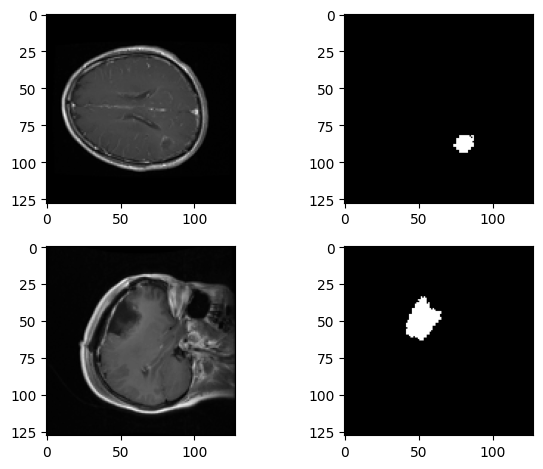

In [42]:
r1 = np.random.randint(1, 1141, size=(1, 2))

plt.subplot(2, 2, 1)
plt.imshow(image_dataset[r1[0][0], :, :, :], cmap='gray')

plt.subplot(2, 2, 2)
plt.imshow(mask_dataset[r1[0][0], :, :, :], cmap='gray')

plt.subplot(2, 2, 3)
plt.imshow(image_dataset[r1[0][1], :, :, :], cmap='gray')

plt.subplot(2, 2, 4)
plt.imshow(mask_dataset[r1[0][1], :, :, :], cmap='gray')

plt.tight_layout()
plt.show()

In [39]:
x_train, x_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size=0.2, random_state=43)

backbone = 'resnet34'
preprocess_func = sm.get_preprocessing(backbone)

x_train_processed = preprocess_func(x_train)
x_test_processed = preprocess_func(x_test)

In [40]:
tf.keras.backend.clear_session()

model = sm.Unet(backbone_name=backbone, input_shape=(128, 128, 1), encoder_weights=None, activation='sigmoid', classes=1)

model.compile(optimizer='adam', loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 data (InputLayer)           [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 bn_data (BatchNormalizatio  (None, 128, 128, 1)          3         ['data[0][0]']                
 n)                                                                                               
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 134, 134, 1)          0         ['bn_data[0][0]']             
 g2D)                                                                                             
                                                                                            

                                                                                                  
 zero_padding2d_6 (ZeroPadd  (None, 34, 34, 64)           0         ['stage1_unit3_relu1[0][0]']  
 ing2D)                                                                                           
                                                                                                  
 stage1_unit3_conv1 (Conv2D  (None, 32, 32, 64)           36864     ['zero_padding2d_6[0][0]']    
 )                                                                                                
                                                                                                  
 stage1_unit3_bn2 (BatchNor  (None, 32, 32, 64)           256       ['stage1_unit3_conv1[0][0]']  
 malization)                                                                                      
                                                                                                  
 stage1_un

                                                                                                  
 zero_padding2d_12 (ZeroPad  (None, 18, 18, 128)          0         ['stage2_unit3_relu1[0][0]']  
 ding2D)                                                                                          
                                                                                                  
 stage2_unit3_conv1 (Conv2D  (None, 16, 16, 128)          147456    ['zero_padding2d_12[0][0]']   
 )                                                                                                
                                                                                                  
 stage2_unit3_bn2 (BatchNor  (None, 16, 16, 128)          512       ['stage2_unit3_conv1[0][0]']  
 malization)                                                                                      
                                                                                                  
 stage2_un

                                                                                                  
 zero_padding2d_18 (ZeroPad  (None, 10, 10, 256)          0         ['stage3_unit2_relu1[0][0]']  
 ding2D)                                                                                          
                                                                                                  
 stage3_unit2_conv1 (Conv2D  (None, 8, 8, 256)            589824    ['zero_padding2d_18[0][0]']   
 )                                                                                                
                                                                                                  
 stage3_unit2_bn2 (BatchNor  (None, 8, 8, 256)            1024      ['stage3_unit2_conv1[0][0]']  
 malization)                                                                                      
                                                                                                  
 stage3_un

 ding2D)                                                                                          
                                                                                                  
 stage3_unit5_conv1 (Conv2D  (None, 8, 8, 256)            589824    ['zero_padding2d_24[0][0]']   
 )                                                                                                
                                                                                                  
 stage3_unit5_bn2 (BatchNor  (None, 8, 8, 256)            1024      ['stage3_unit5_conv1[0][0]']  
 malization)                                                                                      
                                                                                                  
 stage3_unit5_relu2 (Activa  (None, 8, 8, 256)            0         ['stage3_unit5_bn2[0][0]']    
 tion)                                                                                            
          

 ding2D)                                                                                          
                                                                                                  
 stage4_unit2_conv1 (Conv2D  (None, 4, 4, 512)            2359296   ['zero_padding2d_30[0][0]']   
 )                                                                                                
                                                                                                  
 stage4_unit2_bn2 (BatchNor  (None, 4, 4, 512)            2048      ['stage4_unit2_conv1[0][0]']  
 malization)                                                                                      
                                                                                                  
 stage4_unit2_relu2 (Activa  (None, 4, 4, 512)            0         ['stage4_unit2_bn2[0][0]']    
 tion)                                                                                            
          

 decoder_stage1a_conv (Conv  (None, 16, 16, 128)          442368    ['decoder_stage1_concat[0][0]'
 2D)                                                                ]                             
                                                                                                  
 decoder_stage1a_bn (BatchN  (None, 16, 16, 128)          512       ['decoder_stage1a_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 decoder_stage1a_relu (Acti  (None, 16, 16, 128)          0         ['decoder_stage1a_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 decoder_stage1b_conv (Conv  (None, 16, 16, 128)          147456    ['decoder_stage1a_relu[0][0]']
 2D)      

 decoder_stage4b_bn (BatchN  (None, 128, 128, 16)         64        ['decoder_stage4b_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 decoder_stage4b_relu (Acti  (None, 128, 128, 16)         0         ['decoder_stage4b_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 final_conv (Conv2D)         (None, 128, 128, 1)          145       ['decoder_stage4b_relu[0][0]']
                                                                                                  
 sigmoid (Activation)        (None, 128, 128, 1)          0         ['final_conv[0][0]']          
                                                                                                  
Total para

In [49]:
early_stop = EarlyStopping(min_delta = 0.01, patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='best_optimized_unet_model', save_best_only=True)
history = model.fit(x_train_processed, y_train, epochs=20, validation_data=(x_test_processed, y_test), callbacks=[early_stop, model_checkpoint])

Epoch 1/20
29/29 [==============================] - ETA: 0s - loss: 0.8970 - iou_score: 0.1966INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


29/29 [==============================] - 134s 5s/step - loss: 0.8970 - iou_score: 0.1966 - val_loss: 11679.4893 - val_iou_score: 1.2435e-09
Epoch 2/20
29/29 [==============================] - ETA: 0s - loss: 0.8170 - iou_score: 0.2663INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


29/29 [==============================] - 132s 5s/step - loss: 0.8170 - iou_score: 0.2663 - val_loss: 3226.8320 - val_iou_score: 1.2435e-09
Epoch 3/20
29/29 [==============================] - ETA: 0s - loss: 0.7515 - iou_score: 0.3269INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


29/29 [==============================] - 132s 5s/step - loss: 0.7515 - iou_score: 0.3269 - val_loss: 3.2799 - val_iou_score: 0.0616
Epoch 4/20
29/29 [==============================] - ETA: 0s - loss: 0.7042 - iou_score: 0.3703INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


29/29 [==============================] - 142s 5s/step - loss: 0.7042 - iou_score: 0.3703 - val_loss: 1.1090 - val_iou_score: 0.1639
Epoch 5/20
29/29 [==============================] - ETA: 0s - loss: 0.6603 - iou_score: 0.4122INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


29/29 [==============================] - 150s 5s/step - loss: 0.6603 - iou_score: 0.4122 - val_loss: 1.0894 - val_iou_score: 0.2040
Epoch 6/20
29/29 [==============================] - ETA: 0s - loss: 0.6258 - iou_score: 0.4430INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


29/29 [==============================] - 142s 5s/step - loss: 0.6258 - iou_score: 0.4430 - val_loss: 0.7775 - val_iou_score: 0.3384
Epoch 7/20
29/29 [==============================] - 121s 4s/step - loss: 0.5887 - iou_score: 0.4747 - val_loss: 0.8903 - val_iou_score: 0.2852
Epoch 8/20
29/29 [==============================] - ETA: 0s - loss: 0.5645 - iou_score: 0.4981INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


29/29 [==============================] - 138s 5s/step - loss: 0.5645 - iou_score: 0.4981 - val_loss: 0.6506 - val_iou_score: 0.4250
Epoch 9/20
29/29 [==============================] - ETA: 0s - loss: 0.5416 - iou_score: 0.5171INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


29/29 [==============================] - 139s 5s/step - loss: 0.5416 - iou_score: 0.5171 - val_loss: 0.6132 - val_iou_score: 0.4472
Epoch 10/20
29/29 [==============================] - 122s 4s/step - loss: 0.5387 - iou_score: 0.5226 - val_loss: 0.6467 - val_iou_score: 0.4429
Epoch 11/20
29/29 [==============================] - 119s 4s/step - loss: 0.5035 - iou_score: 0.5513 - val_loss: 0.7238 - val_iou_score: 0.3477
Epoch 12/20
29/29 [==============================] - 127s 4s/step - loss: 0.4959 - iou_score: 0.5596 - val_loss: 0.6387 - val_iou_score: 0.4231
Epoch 13/20
29/29 [==============================] - ETA: 0s - loss: 0.4766 - iou_score: 0.5750INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


29/29 [==============================] - 151s 5s/step - loss: 0.4766 - iou_score: 0.5750 - val_loss: 0.6017 - val_iou_score: 0.4539
Epoch 14/20
29/29 [==============================] - ETA: 0s - loss: 0.4546 - iou_score: 0.5956INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


29/29 [==============================] - 146s 5s/step - loss: 0.4546 - iou_score: 0.5956 - val_loss: 0.5812 - val_iou_score: 0.4723
Epoch 15/20
29/29 [==============================] - 123s 4s/step - loss: 0.4743 - iou_score: 0.5799 - val_loss: 0.5950 - val_iou_score: 0.4701
Epoch 16/20
29/29 [==============================] - ETA: 0s - loss: 0.4218 - iou_score: 0.6235INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


29/29 [==============================] - 135s 5s/step - loss: 0.4218 - iou_score: 0.6235 - val_loss: 0.5727 - val_iou_score: 0.4837
Epoch 17/20
29/29 [==============================] - ETA: 0s - loss: 0.4241 - iou_score: 0.6240INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


29/29 [==============================] - 136s 5s/step - loss: 0.4241 - iou_score: 0.6240 - val_loss: 0.5507 - val_iou_score: 0.5125
Epoch 18/20
29/29 [==============================] - 117s 4s/step - loss: 0.3950 - iou_score: 0.6489 - val_loss: 0.5857 - val_iou_score: 0.4835
Epoch 19/20
29/29 [==============================] - ETA: 0s - loss: 0.3724 - iou_score: 0.6673INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


INFO:tensorflow:Assets written to: best_optimized_unet_model\assets


29/29 [==============================] - 134s 5s/step - loss: 0.3724 - iou_score: 0.6673 - val_loss: 0.5498 - val_iou_score: 0.5043
Epoch 20/20
29/29 [==============================] - 119s 4s/step - loss: 0.3613 - iou_score: 0.6796 - val_loss: 0.5673 - val_iou_score: 0.4949


In [50]:
n = np.random.randint(0, len(x_test))
test_image = x_test_processed[n]
test_image = np.expand_dims(test_image, axis=0)

predicted_image = model.predict(test_image)
print(predicted_image.shape)
predicted_image = (predicted_image[0, :, :, 0] > 0.5).astype(np.uint8)

1/1 [==============================] - 0s 81ms/step
(1, 128, 128, 1)


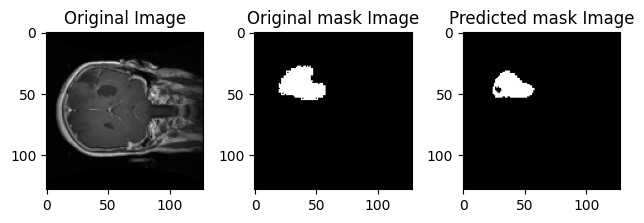

In [51]:
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(x_test[n, :, :, :], cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Original mask Image')
plt.imshow(y_test[n, :, :, :], cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Predicted mask Image')
plt.imshow(predicted_image, cmap='gray')

plt.tight_layout()
plt.show()